In [1]:
import pandas as pd
from pathlib import Path
import glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [2]:
import pandas as pd
import os
from pathlib import Path

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *

In [66]:
# What is my home directory?
home = Path.cwd()
home

WindowsPath('C:/Users/altor/Documents/GA/Project/Food')

In [46]:
# what's the data directory?
datadir = Path.joinpath(home, 'data')
datadir

WindowsPath('C:/Users/altor/Documents/GA/Project/Food/data')

In [49]:
# Build an indestructible filepath this way.
filepath=Path(home, 'data', 'Food_clean2.csv').joinpath()
print(filepath)

C:\Users\altor\Documents\GA\Project\Food\data\Food_clean2.csv


In [51]:
filepath=Path(home, 'data', 'Food_clean.csv').joinpath()
print(filepath)

C:\Users\altor\Documents\GA\Project\Food\data\Food_clean.csv


In [ ]:
# On a Windows machine, your file path may have to look like this:
# df=pd.read_csv(r'..\..\datasets\ufo.csv')

In [69]:
df=pd.read_csv(r'C:\Users\altor\Documents\GA\Project\Food\data\Food_clean.csv', encoding="latin1")
df.head(3)

,FIPS,State,County,2010 Census Population,PCT_LACCESS_POP10,PCT_LACCESS_HHNV10,GROCPTH09,SUPERCPTH09,CONVSPTH09,SNAPSPTH12,...,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,PERPOV10,CHILDPOVRATE15,PERCHLDPOV10,METRO13,POPLOSS10
0,1001.0,Alabama,Autauga,"54,571.0",33.8,3.3,0.1,0.0,0.5,0.7,...,0.0,12.0,26.8,"56,580.0",12.7,0.0,18.8,0.0,1.0,0.0
1,1003.0,Alabama,Baldwin,"182,265.0",19.3,2.1,0.1,0.0,0.7,0.7,...,0.0,16.8,23.0,"52,387.0",12.9,0.0,19.6,0.0,1.0,0.0
2,1005.0,Alabama,Barbour,"27,457.0",20.8,4.1,0.2,0.0,0.5,1.3,...,0.1,14.2,21.9,"31,433.0",32.0,1.0,45.2,1.0,0.0,0.0


In [70]:
# Read that filepath into pandas.
#df=pd.read_csv(filepath, )
#df.head()

# check the dataset

In [76]:
df.columns
#df.describe(include='all')

Index(['FIPS ', 'State', 'County', '2010 Census Population',
       'PCT_LACCESS_POP10', 'PCT_LACCESS_HHNV10', 'GROCPTH09', 'SUPERCPTH09',
       'CONVSPTH09', 'SNAPSPTH12', 'FFRPTH09', 'PC_FFRSALES12', 'PCT_SNAP12',
       'FOODINSEC_10_12', 'SODATAX_STORES14', 'SODATAX_VENDM14',
       'CHIPSTAX_STORES14', 'CHIPSTAX_VENDM14', 'FOOD_TAX14', 'FMRKTPTH09',
       'PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS13', 'RECFACPTH09',
       'PCT_NHWHITE10', 'PCT_NHBLACK10', 'PCT_HISP10', 'PCT_NHASIAN10',
       'PCT_NHNA10', 'PCT_NHPI10', 'PCT_65OLDER10', 'PCT_18YOUNGER10',
       'MEDHHINC15', 'POVRATE15', 'PERPOV10', 'CHILDPOVRATE15', 'PERCHLDPOV10',
       'METRO13', 'POPLOSS10'],
      dtype='object')

In [71]:
# No missings virtually
df['PCT_DIABETES_ADULTS13'].describe

<bound method NDFrame.describe of 0       13.0
1       10.4
2       18.4
3       14.8
4       14.1
5       19.6
6       17.7
7       14.9
8       16.4
9       13.3
10      13.3
11      18.1
12      16.3
13      14.6
14      12.6
15      15.9
16      18.7
17      17.4
18      17.3
19      14.7
20      16.5
21      14.4
22      14.1
23      19.0
24      13.4
25      13.4
26      17.8
27      16.8
28      15.1
29      13.9
        ... 
3113    10.5
3114     8.2
3115     7.9
3116     9.9
3117    10.6
3118     8.6
3119     8.1
3120     6.9
3121    11.7
3122     7.0
3123     8.2
3124    10.2
3125     8.9
3126     9.6
3127     9.0
3128    11.0
3129     8.7
3130    10.1
3131     8.6
3132     9.0
3133     8.4
3134     8.0
3135     8.8
3136     9.8
3137     6.9
3138     8.1
3139     4.8
3140     9.0
3141    12.0
3142    10.0
Name: PCT_DIABETES_ADULTS13, Length: 3143, dtype: float64>

# Histogram of dep var

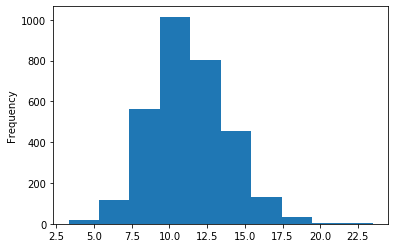

In [72]:
# histogram
df.PCT_DIABETES_ADULTS13.plot(kind='hist');

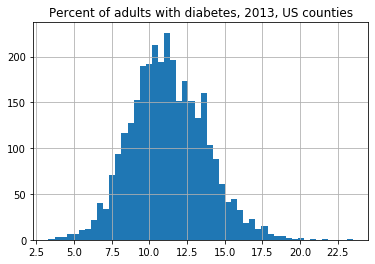

In [73]:
# have more bins; looks much better
ax = df['PCT_DIABETES_ADULTS13'].hist(bins=50)
ax.set_title('Percent of adults with diabetes, 2013, US counties');

In [96]:
# histogram
# Histogram
values = np.random.randn(500)
fig = [go.Histogram(x=PCT_DIABETES_ADULTS13)]
iplot(fig)

NameError: name 'PCT_DIABETES_ADULTS13' is not defined

# Scatter with another continuous variable

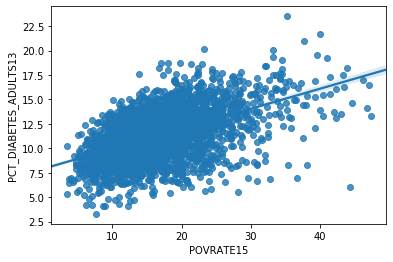

In [74]:
# diabetes and financial resources
sns.regplot(x='POVRATE15', y='PCT_DIABETES_ADULTS13', data=df, fit_reg=True)

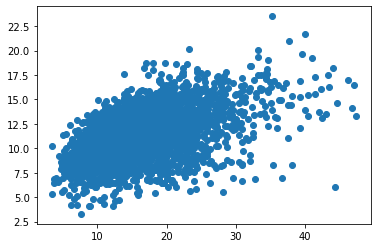

In [94]:
# with Maotplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x=df['POVRATE15'], y=df['PCT_DIABETES_ADULTS13']);

In [95]:
# with plotly
# Now with plotly.
data = [go.Scatter(x=df['POVRATE15'], 
                   y=df['PCT_DIABETES_ADULTS13'],
                    mode = 'markers',
)]
layout = go.Layout(
    title = 'Scatterplot of poverty rates and proportion of adults with diabetes, US counties', # Graph title
    xaxis = dict(title = 'Poverty rates'), # x-axis label
    yaxis = dict(title = 'Proportion of adults with diabetes'), # y-axis label
    hovermode ='closest' # handles multiple points landing on the same vertical
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

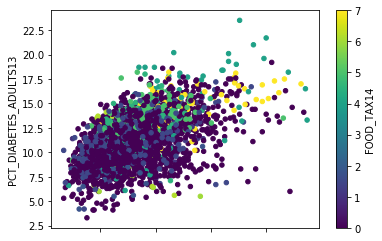

In [75]:
# diabetes and food taxes controled by financial resources
# scatter: with colormap
df.plot(kind = 'scatter', x='POVRATE15', y='PCT_DIABETES_ADULTS13', c="FOOD_TAX14", colormap='viridis');

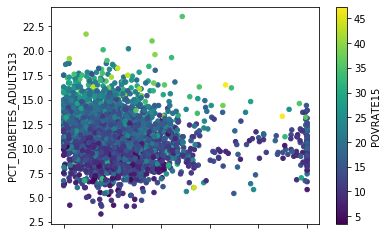

In [83]:
# diabetes and ps pop with low access to stores by poverty:
# access to stores cannot override the financial hardship and diabetes 
# scatter: with colormap
df.plot(kind = 'scatter', x='PCT_LACCESS_POP10', y='PCT_DIABETES_ADULTS13',  c="POVRATE15", colormap='viridis');

# Create a group variable of one of the independent variable list and create a group hisotogram and/or boxplot 

In [85]:
# Check by metro/non-metro counties
df['METRO13'].value_counts()

0.0    1976
1.0    1167
Name: METRO13, dtype: int64

In [88]:
# Compare metro non-metro counties
# diabetic by metro/nonmetro county?
diab1 = df.groupby('METRO13')['PCT_DIABETES_ADULTS13'].mean()
diab1

METRO13
0.0    11.510628
1.0    10.770926
Name: PCT_DIABETES_ADULTS13, dtype: float64

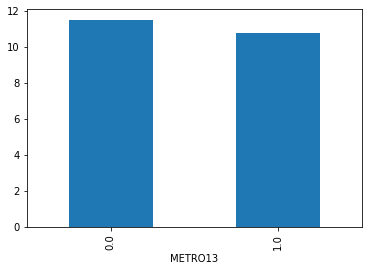

In [89]:
diab1.plot(kind='bar')
### Looks wuite ugly

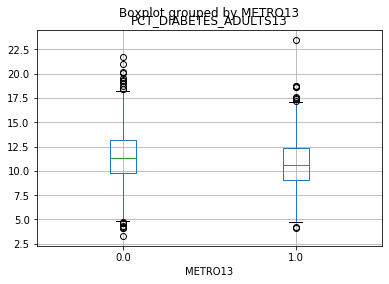

In [90]:
# boxplot fare by embarkation
df.boxplot(column='PCT_DIABETES_ADULTS13', by='METRO13');

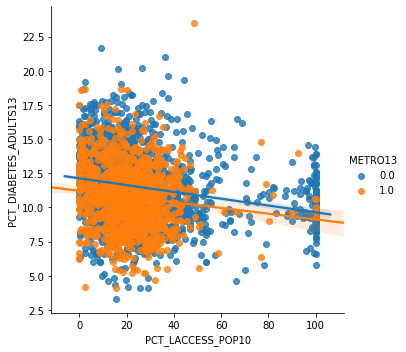

In [86]:
# Do this with seaborn
import seaborn as sns
sns.lmplot(y="PCT_DIABETES_ADULTS13", x="PCT_LACCESS_POP10",  data=df, hue='METRO13', fit_reg='False');

In [ ]:
# Let's display that with plotly.

mydata1 = go.Bar(x=list(accomack['precinct'].value_counts().index), 
                 y=list(accomack['votes']['Donald Trump']), 
                 marker=dict(color='#122A7F'),
                 name='Trump')
mydata2 = go.Bar(x=list(accomack['precinct'].value_counts().index), 
                 y=list(accomack['votes']['Hillary Clinton']), 
                 marker=dict(color='#008080'),
                 name='Clinton')
mydata3 = go.Bar(x=list(accomack['precinct'].value_counts().index), 
                 y=list(accomack['votes']['Other']), 
                 marker=dict(color='#92A5E8'),
                 name='Other')

mylayout = go.Layout(
    title='Grouped bar chart',
    xaxis=dict(title='Candidates'),
    yaxis=dict(title='Number of Votes')    
)
fig = go.Figure(data=[mydata1, mydata2, mydata3], layout=mylayout)
iplot(fig)

In [ ]:
# Convert to csv
df.to_csv('Food_2'.csv')